In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

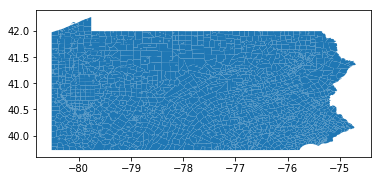

In [2]:
patowns=gpd.read_file("Municipality_Boundaries_2017/geo_export_01d267d0-52ce-42f1-8380-b24f6cf57204.shp")
patowns.plot()

In [3]:
buckstowns = patowns[patowns.county_nam=='BUCKS']

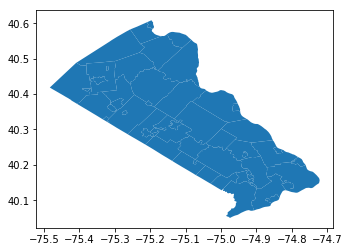

In [4]:
buckstowns.plot()

In [5]:
url=("http://www.buckscounty.org/government/Finance/BoardofAssessment/MillageRates")
tables=pd.read_html(url,header=0)
df1=tables[3]
df1=df1.drop(columns={"Unnamed: 0"}).drop([54])
df1.columns=df1.columns.str.replace(" |/",'_').str.strip().str.lower()
df2=pd.read_csv("bucks_home_values.csv")
df2.columns=df2.columns.str.replace(" |/",'_').str.strip().str.lower()
df3=pd.merge(df1,df2, on='township_boro')
df3['county_millage']=24.45
df3=df3[['township_boro', 'school_district', '2018_twp_boro_millage',
       '2018_2019__school_mills', 'county_millage', 'total_millage',
       'average_residential_home_value']]
df3.columns=df3.columns.str.replace(' ',"_")
df3.rename(columns={"2018_twp_boro_millage":"twp_boro_millage_18",'2018_2019__school_mills':'school_mills_18'},inplace=True)
df3['ave_muni_bill']=((df3.average_residential_home_value*df3.twp_boro_millage_18)/1000).round(2)
df3['ave_school_bill']=((df3.average_residential_home_value*df3.school_mills_18)/1000).round(2)
df3['ave_county_bill']=((df3.average_residential_home_value*df3.county_millage)/1000).round(2)
df3['ave_total_bill']=((df3.average_residential_home_value*df3.total_millage)/1000).round(2)

In [6]:
df3

,township_boro,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill
0,Bedminster Twp,Pennridge SD,7.50000,135.2555,24.45,167.20550,38383,287.87,5191.51,938.46,6417.85
1,Bensalem Twp,Bensalem SD,19.50000,159.1731,24.45,203.12310,23470,457.66,3735.79,573.84,4767.30
2,Bridgeton Twp,Palisades SD,6.00000,114.3000,24.45,144.75000,30553,183.32,3492.21,747.02,4422.55
3,Bristol Boro,Bristol Boro SD,57.89000,154.0000,24.45,236.34000,17777,1029.11,2737.66,434.65,4201.42
4,Bristol Twp,Bristol Twp SD,23.98000,220.1400,24.45,268.57000,18131,434.78,3991.36,443.30,4869.44
5,Buckingham Twp,Central Bucks SD,4.00000,124.1000,24.45,152.55000,16588,66.35,2058.57,405.58,2530.50
6,Chalfont Boro,Central Bucks SD,18.25000,124.1000,24.45,166.80000,29745,542.85,3691.35,727.27,4961.47
7,Doylestown Boro,Central Bucks SD,13.17500,124.1000,24.45,161.72500,29410,387.48,3649.78,719.07,4756.33
8,Doylestown Twp,Central Bucks SD,11.87500,124.1000,24.45,160.42500,40638,482.58,5043.18,993.60,6519.35
9,Dublin Boro,Pennridge SD,18.25000,135.2555,24.45,177.95550,26244,478.95,3549.65,641.67,4670.26


In [7]:
buckstowns.head()

,ansi_code,class_of_m,county,county_nam,dced_id,district_n,fed_aid_ur,fed_id_num,fips_code,fips_count,...,fips_state,gnis_ppl,municipa_1,municipal,objectid,planning_p,shape_are,shape_len,vx_count,geometry
104,1216033,2TWP,09,BUCKS,091385,06,4,23-6005259,4201779128,017,...,42,1216033.0,UPPER MAKEFIELD,224,2093.0,DVRPC,0.005982,0.346368,113.0,POLYGON ((-74.91426302000026 40.26298903436477...
108,1216027,2TWP,09,BUCKS,090935,06,4,23-6000458,4201754688,017,...,42,1216027.0,NORTHAMPTON,218,2396.0,DVRPC,0.007161,0.431747,543.0,POLYGON ((-75.06616793550769 40.21138829414874...
154,1216031,2TWP,09,BUCKS,091265,06,4,23-6000510,4201773016,017,...,42,1216031.0,SPRINGFIELD,222,2406.0,DVRPC,0.008431,0.456049,27.0,POLYGON ((-75.29363381862896 40.56191549143411...
211,1214979,BORO,09,BUCKS,091173,06,4,23-6002940,4201769248,017,...,42,1214979.0,SELLERSVILLE,418,2189.0,DVRPC,0.000320,0.078929,32.0,"POLYGON ((-75.32231815707847 40.3630725648114,..."
223,1216010,2TWP,09,BUCKS,090065,06,4,23-6000248,4201705616,017,...,42,1216010.0,BENSALEM,202,2203.0,DVRPC,0.005721,0.419532,1055.0,"POLYGON ((-74.99165894397615 40.1344050248029,..."


In [8]:
buckstowns.columns

Index(['ansi_code', 'class_of_m', 'county', 'county_nam', 'dced_id',
       'district_n', 'fed_aid_ur', 'fed_id_num', 'fips_code', 'fips_count',
       'fips_mun_c', 'fips_mun_p', 'fips_sq_mi', 'fips_state', 'gnis_ppl',
       'municipa_1', 'municipal', 'objectid', 'planning_p', 'shape_are',
       'shape_len', 'vx_count', 'geometry'],
      dtype='object')

In [9]:
bucks1=buckstowns[['class_of_m','fips_sq_mi', 'municipa_1','geometry']]

In [10]:
bucks1

,class_of_m,fips_sq_mi,municipa_1,geometry
104,2TWP,21.82,UPPER MAKEFIELD,POLYGON ((-74.91426302000026 40.26298903436477...
108,2TWP,26.15,NORTHAMPTON,POLYGON ((-75.06616793550769 40.21138829414874...
154,2TWP,30.64,SPRINGFIELD,POLYGON ((-75.29363381862896 40.56191549143411...
211,BORO,1.17,SELLERSVILLE,"POLYGON ((-75.32231815707847 40.3630725648114,..."
223,2TWP,20.93,BENSALEM,"POLYGON ((-74.99165894397615 40.1344050248029,..."
232,BORO,0.26,RICHLANDTOWN,POLYGON ((-75.31893622586787 40.47907161861421...
234,BORO,1.09,RIEGELSVILLE,POLYGON ((-75.19129083063962 40.58570594796645...
236,2TWP,22.38,NOCKAMIXON,POLYGON ((-75.15062533652618 40.57085684335124...
337,2TWP,26.60,FALLS,(POLYGON ((-74.80029354941779 40.2087775333423...
340,2TWP,20.87,HAYCOCK,POLYGON ((-75.30025923014693 40.49346657710261...


In [12]:
pd.merge(bucks1,df3,how='left')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [17]:
bucks1.rename(columns={'municipa_1':"township_boro"},inplace=True)

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [19]:
pd.merge(bucks1,df3,on='township_boro')

,class_of_m,fips_sq_mi,township_boro,geometry,class_of_m1,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill


In [20]:
bucks1

,class_of_m,fips_sq_mi,township_boro,geometry,class_of_m1
104,2TWP,21.82,UPPER MAKEFIELD,POLYGON ((-74.91426302000026 40.26298903436477...,TWP
108,2TWP,26.15,NORTHAMPTON,POLYGON ((-75.06616793550769 40.21138829414874...,TWP
154,2TWP,30.64,SPRINGFIELD,POLYGON ((-75.29363381862896 40.56191549143411...,TWP
211,BORO,1.17,SELLERSVILLE,"POLYGON ((-75.32231815707847 40.3630725648114,...",BORO
223,2TWP,20.93,BENSALEM,"POLYGON ((-74.99165894397615 40.1344050248029,...",TWP
232,BORO,0.26,RICHLANDTOWN,POLYGON ((-75.31893622586787 40.47907161861421...,BORO
234,BORO,1.09,RIEGELSVILLE,POLYGON ((-75.19129083063962 40.58570594796645...,BORO
236,2TWP,22.38,NOCKAMIXON,POLYGON ((-75.15062533652618 40.57085684335124...,TWP
337,2TWP,26.60,FALLS,(POLYGON ((-74.80029354941779 40.2087775333423...,TWP
340,2TWP,20.87,HAYCOCK,POLYGON ((-75.30025923014693 40.49346657710261...,TWP


In [21]:
df3.head()

,township_boro,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill
0,Bedminster Twp,Pennridge SD,7.50,135.2555,24.45,167.2055,38383,287.87,5191.51,938.46,6417.85
1,Bensalem Twp,Bensalem SD,19.50,159.1731,24.45,203.1231,23470,457.66,3735.79,573.84,4767.30
2,Bridgeton Twp,Palisades SD,6.00,114.3000,24.45,144.7500,30553,183.32,3492.21,747.02,4422.55
3,Bristol Boro,Bristol Boro SD,57.89,154.0000,24.45,236.3400,17777,1029.11,2737.66,434.65,4201.42
4,Bristol Twp,Bristol Twp SD,23.98,220.1400,24.45,268.5700,18131,434.78,3991.36,443.30,4869.44


In [21]:
bucks1.class_of_m.value_counts()

2TWP    30
BORO    23
1TWP     1
Name: class_of_m, dtype: int64

In [22]:
bucks1['class_of_m1']=bucks1.class_of_m.str.replace('2TWP|1TWP','TWP')

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
bucks1

,class_of_m,fips_sq_mi,township_boro,geometry,class_of_m1
104,2TWP,21.82,UPPER MAKEFIELD,POLYGON ((-74.91426302000026 40.26298903436477...,TWP
108,2TWP,26.15,NORTHAMPTON,POLYGON ((-75.06616793550769 40.21138829414874...,TWP
154,2TWP,30.64,SPRINGFIELD,POLYGON ((-75.29363381862896 40.56191549143411...,TWP
211,BORO,1.17,SELLERSVILLE,"POLYGON ((-75.32231815707847 40.3630725648114,...",BORO
223,2TWP,20.93,BENSALEM,"POLYGON ((-74.99165894397615 40.1344050248029,...",TWP
232,BORO,0.26,RICHLANDTOWN,POLYGON ((-75.31893622586787 40.47907161861421...,BORO
234,BORO,1.09,RIEGELSVILLE,POLYGON ((-75.19129083063962 40.58570594796645...,BORO
236,2TWP,22.38,NOCKAMIXON,POLYGON ((-75.15062533652618 40.57085684335124...,TWP
337,2TWP,26.60,FALLS,(POLYGON ((-74.80029354941779 40.2087775333423...,TWP
340,2TWP,20.87,HAYCOCK,POLYGON ((-75.30025923014693 40.49346657710261...,TWP


In [24]:
bucks1['towns']=bucks1.township_boro+" "+bucks1.class_of_m1

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
bucks2=bucks1[['towns','fips_sq_mi','geometry']]

In [26]:
df3.head()

,township_boro,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill
0,Bedminster Twp,Pennridge SD,7.50,135.2555,24.45,167.2055,38383,287.87,5191.51,938.46,6417.85
1,Bensalem Twp,Bensalem SD,19.50,159.1731,24.45,203.1231,23470,457.66,3735.79,573.84,4767.30
2,Bridgeton Twp,Palisades SD,6.00,114.3000,24.45,144.7500,30553,183.32,3492.21,747.02,4422.55
3,Bristol Boro,Bristol Boro SD,57.89,154.0000,24.45,236.3400,17777,1029.11,2737.66,434.65,4201.42
4,Bristol Twp,Bristol Twp SD,23.98,220.1400,24.45,268.5700,18131,434.78,3991.36,443.30,4869.44


In [28]:
bucks2.head()

,towns,fips_sq_mi,geometry
104,UPPER MAKEFIELD TWP,21.82,POLYGON ((-74.91426302000026 40.26298903436477...
108,NORTHAMPTON TWP,26.15,POLYGON ((-75.06616793550769 40.21138829414874...
154,SPRINGFIELD TWP,30.64,POLYGON ((-75.29363381862896 40.56191549143411...
211,SELLERSVILLE BORO,1.17,"POLYGON ((-75.32231815707847 40.3630725648114,..."
223,BENSALEM TWP,20.93,"POLYGON ((-74.99165894397615 40.1344050248029,..."


In [29]:
df3.rename(columns={'township_boro':'towns'},inplace=True)

In [31]:
pd.merge(bucks2,df3, on='towns')

,towns,fips_sq_mi,geometry,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill


In [35]:
bucks2['towns']=bucks2.towns.str.title()

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df3['towns']=df3.towns.str.replace("E R",'East R').str.replace("South",'Southampton').str.replace('.','').str.strip()

In [37]:
testmap1=pd.merge(bucks2,df3, on='towns')

In [38]:
testmap1

,towns,fips_sq_mi,geometry,school_district,twp_boro_millage_18,school_mills_18,county_millage,total_millage,average_residential_home_value,ave_muni_bill,ave_school_bill,ave_county_bill,ave_total_bill
0,Upper Makefield Twp,21.82,POLYGON ((-74.91426302000026 40.26298903436477...,Council Rock SD,7.60250,123.6070,24.45,155.65950,72580,551.79,8971.40,1774.58,11297.77
1,Northampton Twp,26.15,POLYGON ((-75.06616793550769 40.21138829414874...,Council Rock SD,14.91110,123.6070,24.45,162.96810,39812,593.64,4921.04,973.40,6488.09
2,Springfield Twp,30.64,POLYGON ((-75.29363381862896 40.56191549143411...,Palisades SD,12.00000,114.3000,24.45,150.75000,38431,461.17,4392.66,939.64,5793.47
3,Sellersville Boro,1.17,"POLYGON ((-75.32231815707847 40.3630725648114,...",Pennridge SD,24.00000,135.2555,24.45,183.70550,21997,527.93,2975.22,537.83,4040.97
4,Bensalem Twp,20.93,"POLYGON ((-74.99165894397615 40.1344050248029,...",Bensalem SD,19.50000,159.1731,24.45,203.12310,23470,457.66,3735.79,573.84,4767.30
5,Richlandtown Boro,0.26,POLYGON ((-75.31893622586787 40.47907161861421...,Quakertown SD,5.00000,164.3900,24.45,193.84000,21401,107.00,3518.11,523.25,4148.37
6,Riegelsville Boro,1.09,POLYGON ((-75.19129083063962 40.58570594796645...,Palisades SD,13.25000,114.3000,24.45,15.00000,23223,307.70,2654.39,567.80,348.34
7,Nockamixon Twp,22.38,POLYGON ((-75.15062533652618 40.57085684335124...,Palisades SD,6.00000,114.3000,24.45,144.75000,36353,218.12,4155.15,888.83,5262.10
8,Falls Twp,26.60,(POLYGON ((-74.80029354941779 40.2087775333423...,Pennsbury SD,7.22000,167.5400,24.45,199.21000,19796,142.93,3316.62,484.01,3943.56
9,Haycock Twp,20.87,POLYGON ((-75.30025923014693 40.49346657710261...,Quakertown SD,6.00000,164.3900,24.45,194.84000,35539,213.23,5842.26,868.93,6924.42


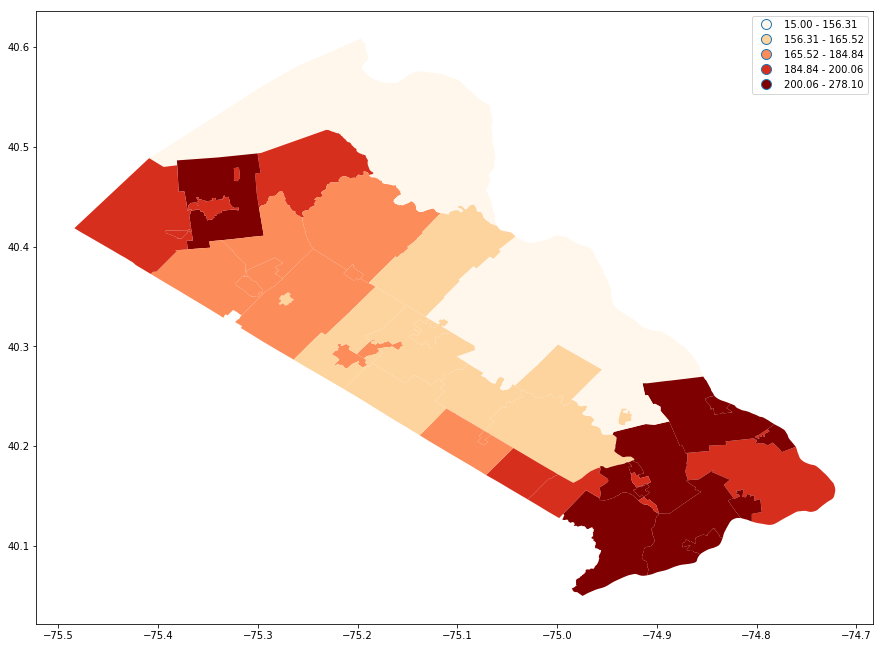

In [45]:
testmap1[testmap1.total_millage.notnull()].plot(column="total_millage",cmap='OrRd',scheme='quantiles',legend=True,figsize=(15,15))

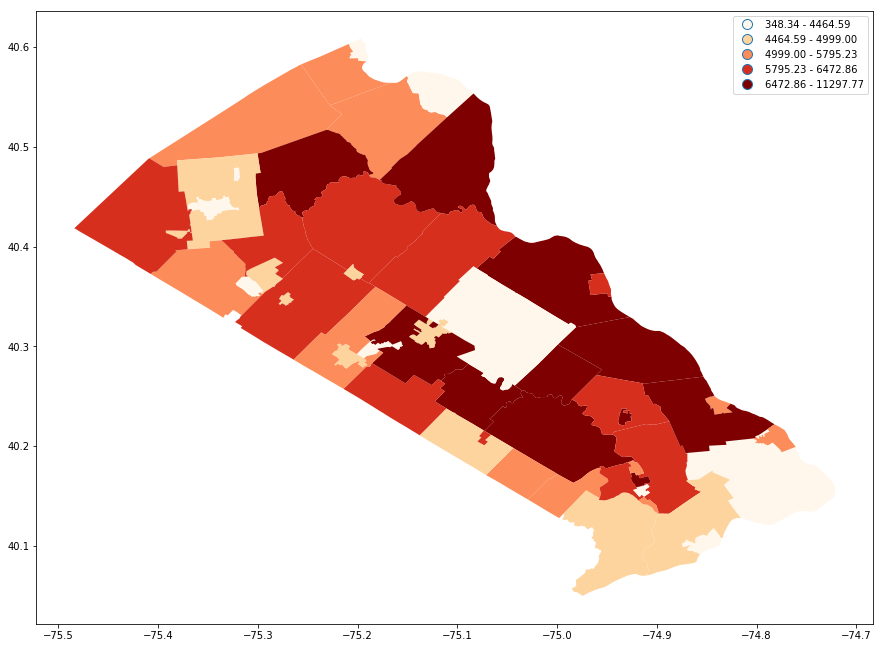

In [46]:
testmap1[testmap1.ave_total_bill.notnull()].plot(column='ave_total_bill',cmap='OrRd',scheme='quantiles',legend=True, figsize=(15,15))
#geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(8, 4))

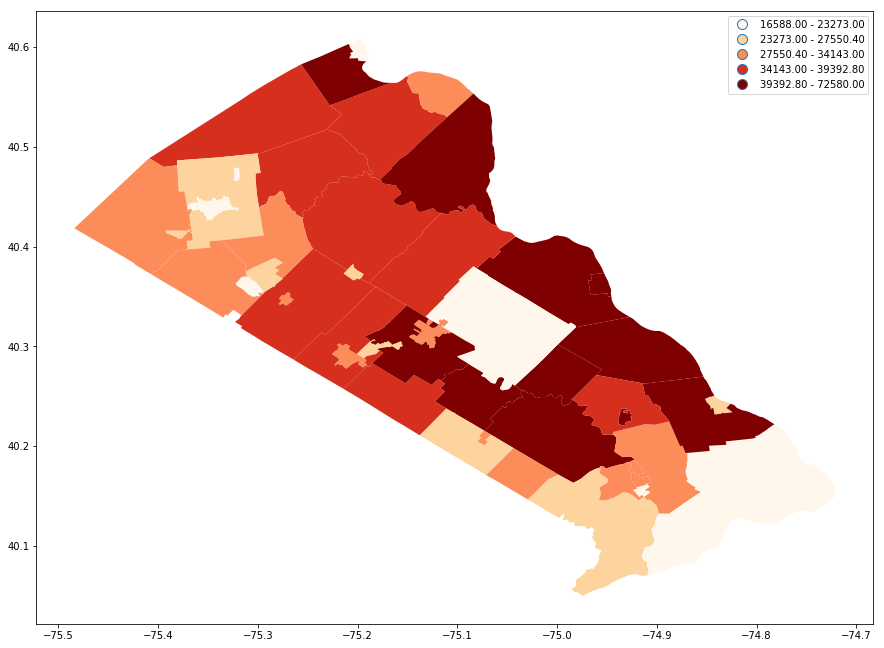

In [47]:
testmap1[testmap1.ave_total_bill.notnull()].plot(column='average_residential_home_value',cmap='OrRd',scheme='quantiles',legend=True, figsize=(15,15))
#geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(8, 4))

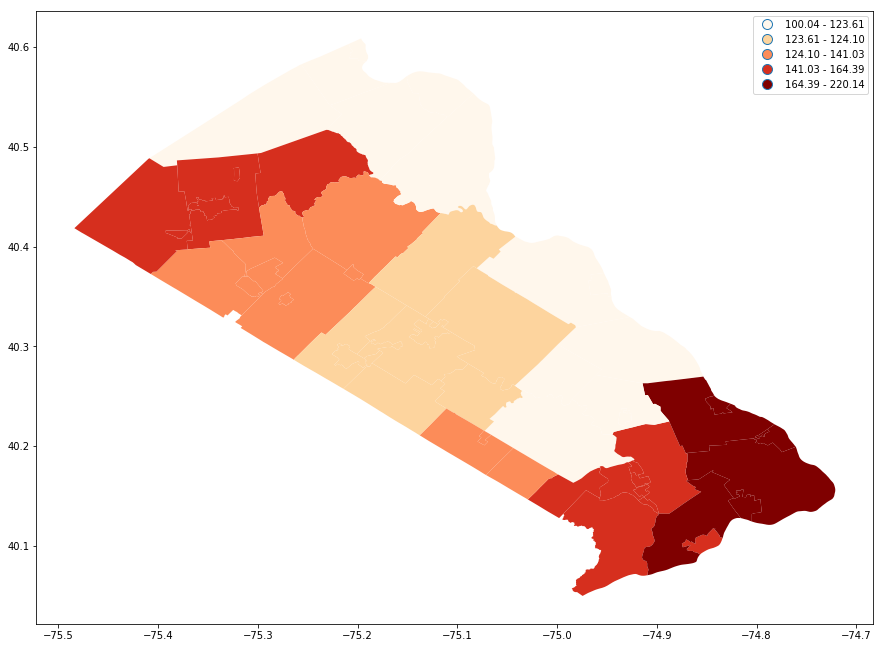

In [48]:
testmap1[testmap1.ave_total_bill.notnull()].plot(column='school_mills_18',cmap='OrRd',scheme='quantiles',legend=True, figsize=(15,15))
#geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(8, 4))


In [63]:
df3.school_mills_18.value_counts()

124.1000    9
135.2555    8
164.3900    6
114.3000    6
159.5000    6
123.6070    5
167.5400    4
141.0286    3
100.0409    2
220.1400    1
206.7967    1
159.1731    1
154.0000    1
Name: school_mills_18, dtype: int64

In [49]:
testmap1.to_file("testmap1.rar")

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [52]:
testmap1.ave_total_bill.median()

5512.38